https://github.com/L-Lewis/Kickstarter-success-machine-learning/blob/master/Kickstarter-project.ipynb

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pl
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sms
%matplotlib inline

import pandas as pd
import glob

## Combining data into single dataframe

In [3]:
path = r'data'
all_files = glob.glob(path + '/*.csv')

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

## Dealing with duplicates

In [5]:
# check for duplicate records
frame['id'].nunique()

182264

In [6]:
frame['name'].nunique()

181680

In [7]:
# state column should be our final predicted variable--what is in that column?
frame['state'].value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

In [8]:
# we want to drop any rows that don't have 'successful' or 'failed' state
a = ['successful', 'failed']
frame = frame[frame['state'].isin(a)]

In [9]:
frame.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,...,record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international


In [10]:
frame['state'].value_counts()

successful    117465
failed         75199
Name: state, dtype: int64

In [11]:
# drop duplicate records
frame = frame.drop_duplicates(subset = 'id', keep = 'first')

In [12]:
pd.set_option('display.max_columns', None)
frame.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international


## Feature engineering

In [13]:
# converting the goal to usd
frame['usd_goal'] = frame['goal'] * frame['static_usd_rate']

In [14]:
# extracting category--we need the first part of what's in the 'slug' key

f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
frame['category'] = frame.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
frame['category'] = frame.apply(f, axis=1)

In [15]:
frame.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal
1,47,A colorful Dia de los Muertos themed oracle de...,games,1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic,1000.0
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...",music,22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international,15000.0


In [16]:
frame['category'].value_counts()

music           24591
film & video    23889
art             18061
technology      17782
publishing      16997
food            13298
games           10735
fashion          8869
comics           6358
design           5883
photography      5689
crafts           5448
theater          4686
journalism       3684
dance            3009
Name: category, dtype: int64

In [17]:
# converting the date and time columns
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    frame[c] = pd.to_datetime(frame[c], origin='unix', unit='s')
print(f"The dataset contains projects added to Kickstarter between {min(frame.created_at).strftime('%d %B %Y')} and {max(frame.created_at).strftime('%d %B %Y')}.")

The dataset contains projects added to Kickstarter between 22 April 2009 and 04 March 2019.


What to get from the columns with time:

- these columns *may* have interesting information--such as the best month of the year to launch, or the best time of day. We can display this as graphs
- however, this stratification of the data (e.g. by month, or by time of day) may be inappropriate for the model--this can hide certain trends (e.g. looking at time of day alone--it seems like 12-2pm is the best time to launch; but is that also the case for the weekend?)
- we have to do more thinking about how to best include the timing information into the model exactly 
- for now (for our basic model) we will forego looking at the timing information--incorporate it later
- what we *will* do is get the duration of the campaign, into a separate column

In [18]:
frame.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,usd_goal
1,47,A colorful Dia de los Muertos themed oracle de...,games,1950,US,2017-08-02 14:28:13,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,2017-09-09 17:00:59,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,2017-08-10 17:00:59,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic,1000.0
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...",music,22404,US,2012-09-30 06:45:33,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,2013-06-12 05:03:15,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,2013-05-13 05:03:15,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international,15000.0


## Creating trimmed dataframe

In [19]:
# create a trimmed dataframe; 
cols_to_drop = ['blurb', 'converted_pledged_amount', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_type']
trimmed_frame = frame.drop(columns=cols_to_drop)

In [20]:
# Campaign length
trimmed_frame['campaign_days'] = frame['deadline'] - frame['launched_at']
trimmed_frame['campaign_days'] = trimmed_frame['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
trimmed_frame['launch_month'] = frame['launched_at'].dt.month_name()
#trimmed_frame['year_month'] = pd.to_datetime(frame['launched_at']).dt.to_period('M')
trimmed_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168979 entries, 1 to 209221
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   backers_count  168979 non-null  int64         
 1   category       168979 non-null  object        
 2   country        168979 non-null  object        
 3   launched_at    168979 non-null  datetime64[ns]
 4   staff_pick     168979 non-null  bool          
 5   state          168979 non-null  object        
 6   usd_pledged    168979 non-null  float64       
 7   usd_goal       168979 non-null  float64       
 8   campaign_days  168979 non-null  int64         
 9   launch_month   168979 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 13.1+ MB


## Creating prediction models of Kickstarter project success

Importing libraries and packages needed for creation of machine learning models:

In [21]:
import numpy as np

#train-test split modules
from sklearn.model_selection import train_test_split
RSEED = 50

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

#evaluation metrics
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score,roc_auc_score

#models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#hyperparameter adjustment
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 

#for XGBoost, the following needs to be installed via terminal:
# brew install libomp
# pip install xgboost

### Exploring how data needs to be prepared for ML

The data was examined to check for completeness and to decide which features to include in the model:

In [22]:
trimmed_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168979 entries, 1 to 209221
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   backers_count  168979 non-null  int64         
 1   category       168979 non-null  object        
 2   country        168979 non-null  object        
 3   launched_at    168979 non-null  datetime64[ns]
 4   staff_pick     168979 non-null  bool          
 5   state          168979 non-null  object        
 6   usd_pledged    168979 non-null  float64       
 7   usd_goal       168979 non-null  float64       
 8   campaign_days  168979 non-null  int64         
 9   launch_month   168979 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 13.1+ MB


- There are no null values in the data
- The predicted variable is state--we will need to check if it is balanced or not
- The following features are related to the project campaign, rather than being inherent properties at the start of the project:
    - backers_count
    - usd_pledged

    As this information isn't known when the project creator is starting the campaign, it's not very useful for foretelling whether the project is likely to be a success. Therefore, these features were not included in the model
    
- Numerical features, to be transformed and normalised:
    - usd_goal
    - campaign_days

- Categorical features, to be transformed into dummies:
    - category
    - country
    - staff_pick
    - launch_month

- The 'launched_at' column was only used to derive the 'campaign_days' and the 'launch_month' columns and was therefore dropped

Dropping of irrelevant features:

In [23]:
trimmed_frame = trimmed_frame.drop('backers_count', axis = 1)
trimmed_frame = trimmed_frame.drop('usd_pledged', axis = 1)
trimmed_frame = trimmed_frame.drop('launched_at', axis = 1)

The dataframe was separated into the predicted variable (target; 'state') and the predictor features for the model:

In [24]:
target = trimmed_frame['state']
features = trimmed_frame.drop('state', axis = 1)

The target variable was examined to check whether the outcome classes were balanced or not:

In [25]:
perc_success = round((target.value_counts()[0])/target.count()*100, 2)
perc_failed = round((target.value_counts()[1])/target.count()*100, 2)
print(f"{perc_failed}% of projects failed.")
print(f"{perc_success}% of projects were successful.")

43.91% of projects failed.
56.09% of projects were successful.


The data seems to be fairly well-balanced. This means that little further intervention is needed to be done to further balance the outcome classes. Nevertheless, since there is about 13% difference between the number of projects that succeeded vs failed, a weighted average will be used for the evaluation metrics that will be used to assess model performance.

The target variable is encoded into numerical values (0 for failure, 1 for success):

In [26]:
target = target.apply(lambda x: 1 if x == 'successful' else 0)

### Normalizing the numerical features

Machine learning models assume the input numerical data to be normally distributed. Therefore, the distribution of the two numerical features were checked:

In [27]:
features.describe()

,usd_goal,campaign_days
count,1.689790e+05,168979.000000
mean,4.109688e+04,32.643287
std,1.110957e+06,11.761523
min,1.000000e-02,1.000000
25%,1.500000e+03,30.000000
50%,5.000000e+03,30.000000
75%,1.329770e+04,34.000000
max,1.523501e+08,93.000000


(array([6.0700e+02, 3.2360e+03, 3.9670e+03, 6.1420e+03, 1.0085e+04,
        1.0206e+04, 9.1405e+04, 8.3820e+03, 7.0660e+03, 8.5070e+03,
        2.4650e+03, 1.4700e+03, 1.4834e+04, 1.3200e+02, 4.4000e+01,
        5.3000e+01, 4.2000e+01, 3.1000e+01, 6.2000e+01, 2.4300e+02]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ,
        51.6, 56.2, 60.8, 65.4, 70. , 74.6, 79.2, 83.8, 88.4, 93. ]),
 <BarContainer object of 20 artists>)

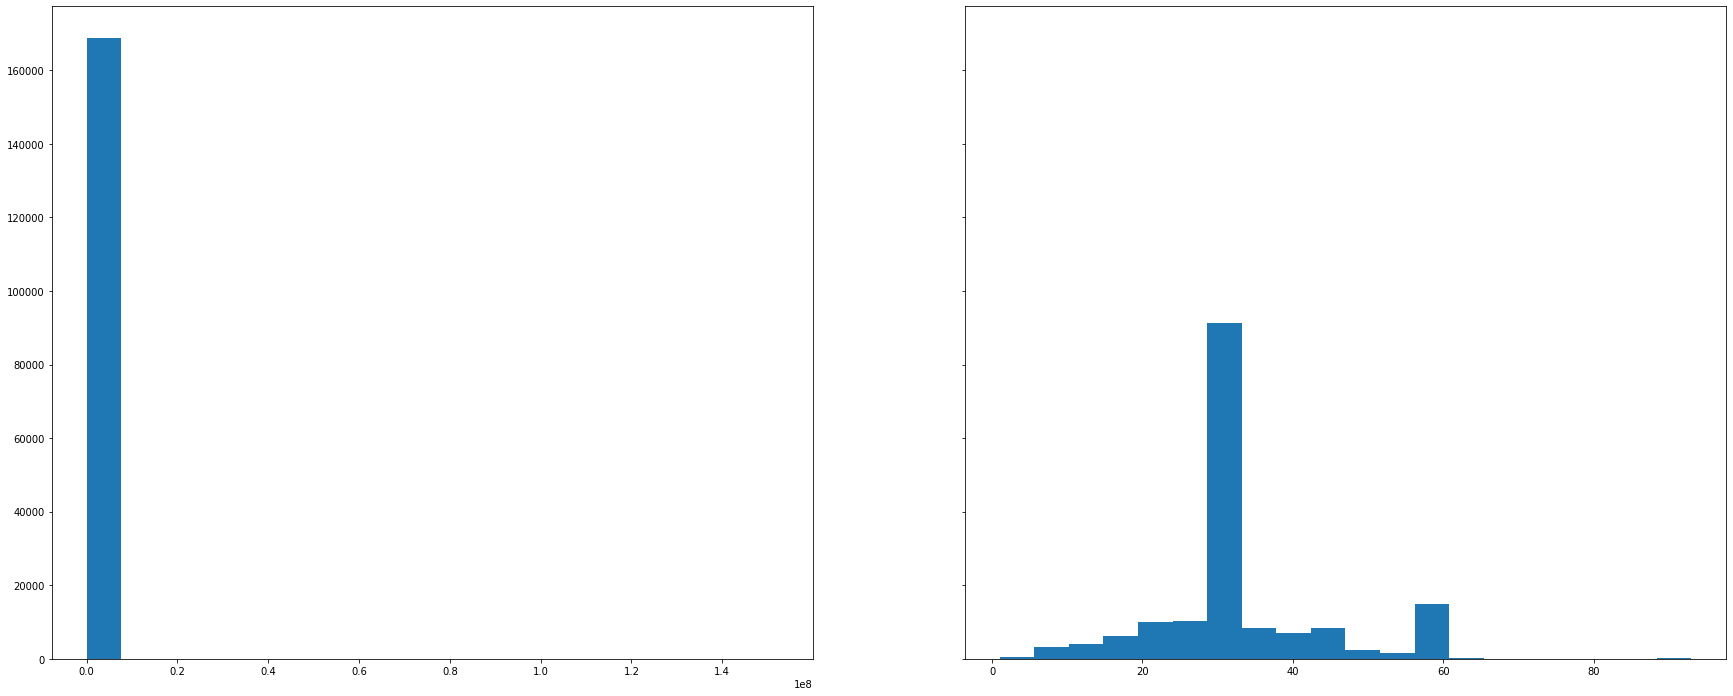

In [28]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize = (30, 12))
axs[0].hist(features['usd_goal'], bins = 20)
axs[1].hist(features['campaign_days'], bins = 20)

- the 'campaign_days' was evenly distributed
- the 'usd_goal' feature was very skewed, as evidenced by the histogram and the discrepancy between the mean and median--the data was thus log-transformed, to achieve normal distribution.

The log transformation of 'usd_goal' resulted in more normally-distributed data:

In [29]:
skewed = ['usd_goal']
features[skewed] = features[skewed].apply(lambda x: np.log(x + 1))

(array([6.0700e+02, 3.2360e+03, 3.9670e+03, 6.1420e+03, 1.0085e+04,
        1.0206e+04, 9.1405e+04, 8.3820e+03, 7.0660e+03, 8.5070e+03,
        2.4650e+03, 1.4700e+03, 1.4834e+04, 1.3200e+02, 4.4000e+01,
        5.3000e+01, 4.2000e+01, 3.1000e+01, 6.2000e+01, 2.4300e+02]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ,
        51.6, 56.2, 60.8, 65.4, 70. , 74.6, 79.2, 83.8, 88.4, 93. ]),
 <BarContainer object of 20 artists>)

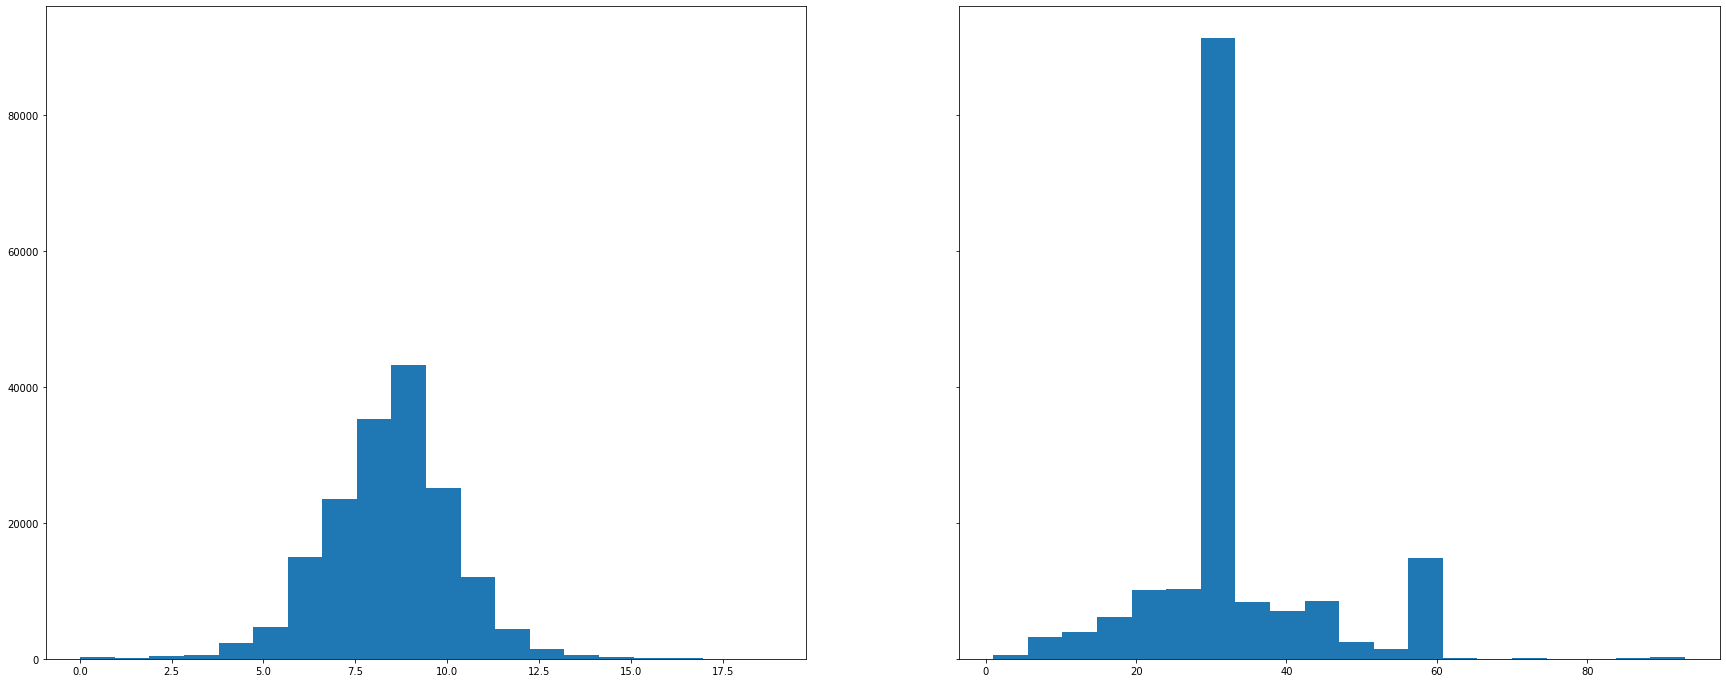

In [30]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize = (30, 12))
#fig.figsize = (30, 12)

axs[0].hist(features['usd_goal'], bins = 20)
axs[1].hist(features['campaign_days'], bins = 20)

### Transforming categorical variables into dummies

The 'category', 'country', 'staff_pick' and 'launch_month' features were all string objects or Boolean and thus needed to be one-hot encoded before they could be implemented in a model:

In [31]:
cat_feats = ['category', 'country', 'staff_pick', 'launch_month']

features = pd.get_dummies(features,columns=cat_feats,drop_first=True)

In [32]:
# Print the number of features after one-hot encoding
encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

49 total features after one-hot encoding.


### Test-train split

The data was split into a train and a test set, with 20% of the data being used for the test set. Stratification based on the target variable was used, to ensure the train and test sets had an even distribution of outcome classes.

In [33]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size = 0.2, random_state = RSEED)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 135183 samples.
Testing set has 33796 samples.


### Scaling the data

The numerical features have very different scales, which negatively affects model building. The MinMaxScaler was used to scale these features, to ensure their range falls between 0 and 1:

In [34]:
scaler = MinMaxScaler()
cols_to_scale = ['usd_goal', 'campaign_days']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

<ipython-input-34-62260c9b0cd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
/Users/christinarudolf/Documents/neuefische_ds/ds_project_2_ks/.venv/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-34-62260c9b0cd0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

### Naive predictor performance

In order to have a baseline for comparison for our model building, we created a naive performance predictor. This is an untrained 'model' that onlxy predicts the majority outcome class (in our case--that the project is successful). Our supervised learning models are expected to improve on the performance of the naive predictor.

Accuracy and precision were deemed to be the two most important metrics for evaluating model performance: 
- accuracy was picked because it's undesirable to have too many false predictions overall
- f1 score
- precision was important to have more confidence that if your project is predicted to succeed, it would really be the case. Having too many false positives would reduce confidence in the model (false negatives are more acceptable--i.e. a success that the model predicts to be a failure; that's just a happy surprise)

In [34]:
# Calculate accuracy

base_accuracy = ((target.value_counts()[1]) / target.count())

# Calculating precision

base_precision = (target.value_counts()[1]) / ((target.value_counts()[0]) + (target.value_counts()[1]))

# Calculating recall

base_recall = (target.value_counts()[1]) / ((target.value_counts()[1]) + 0)

# Calculating the F-1 score

base_fscore = 2 * (base_precision * base_recall)/(base_precision + base_recall)

print(f"Naive Predictor: Accuracy score: {base_accuracy: .2f}, Precision: {base_precision: .2f}, F1 Score: {base_fscore: .2f}")


Naive Predictor: [Accuracy score:  0.56, Precision:  0.56, F1 Score:  0.72


### Model implementation and evaluation

In [37]:
# Instantiate the model; includes random state and probability estimates
logreg_model = LogisticRegression(random_state=RSEED)
rand_forst_model = RandomForestClassifier(random_state=RSEED)
svm_model = SVC(kernel='linear') #put the probability option back in when fine-tuning the model; but for now, leave it out, because it takes ridiculously long probability=True
xgb_model = XGBClassifier(random_state=RSEED)

In [38]:
# measure how long each model takes to run--function

# Define a train and evaluation function
# Note--weighted averages are used for the evaluation metrics, to account for the slight difference in the class sizes
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set and train set
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the train set
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute precision on the train set
    results['prec_train'] = precision_score(y_train, predictions_train, average = "weighted")
        
    # Compute precision on test set
    results['prec_test'] = precision_score(y_test,predictions_test, average = "weighted")

    # Compute F-score on the the train set
    results['f_train'] = f1_score(y_train, predictions_train, average = "weighted")
        
    # Compute F-score on the test set
    results['f_test'] = f1_score(y_test, predictions_test, average = "weighted")
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [39]:
# Runs the fitting and prediction of the models
# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [logreg_model, rand_forst_model, svm_model, xgb_model]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

LogisticRegression trained on 1352 samples.
LogisticRegression trained on 13518 samples.
LogisticRegression trained on 135183 samples.
RandomForestClassifier trained on 1352 samples.
RandomForestClassifier trained on 13518 samples.
RandomForestClassifier trained on 135183 samples.
SVC trained on 1352 samples.
SVC trained on 13518 samples.
SVC trained on 135183 samples.
[01:09:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/Users/christinarudolf/Documents/neuefische_ds/ds_project_2_ks/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier o

<ipython-input-40-8b28f9a6cca7>:54: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


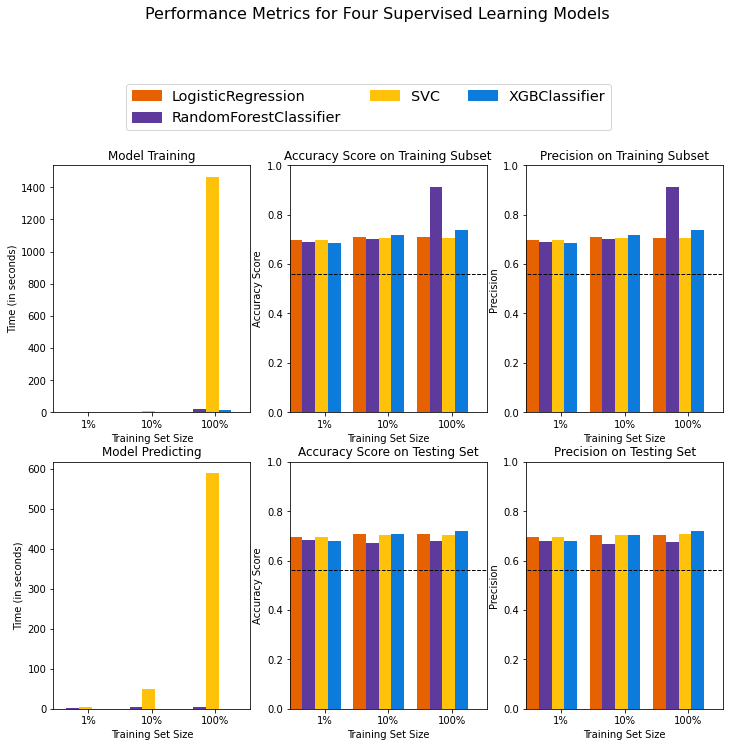

In [40]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

fig, ax = plt.subplots(2, 3, figsize = (12,10))
bar_width = 0.2
colors = ['#E66100','#5D3A9B','#FFC20A', '#0C7BDC']

for k, learner in enumerate(results.keys()):
    for j, metric in enumerate(['train_time', 'acc_train', 'prec_train', 'pred_time', 'acc_test', 'prec_test']):
        for i in np.arange(3):
            # Creative plot code
            ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
            ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
            ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
            ax[j//3, j%3].set_xlabel("Training Set Size")
            ax[j//3, j%3].set_xlim((-0.1, 3.0))
# Add unique y-labels
ax[0, 0].set_ylabel("Time (in seconds)")
ax[0, 1].set_ylabel("Accuracy Score")
ax[0, 2].set_ylabel("Precision")
ax[1, 0].set_ylabel("Time (in seconds)")
ax[1, 1].set_ylabel("Accuracy Score")
ax[1, 2].set_ylabel("Precision")

# Add titles
ax[0, 0].set_title("Model Training")
ax[0, 1].set_title("Accuracy Score on Training Subset")
ax[0, 2].set_title("Precision on Training Subset")
ax[1, 0].set_title("Model Predicting")
ax[1, 1].set_title("Accuracy Score on Testing Set")
ax[1, 2].set_title("Precision on Testing Set")

# Add horizontal lines for naive predictors
ax[0, 1].axhline(y = base_accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
ax[1, 1].axhline(y = base_accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
ax[0, 2].axhline(y = base_precision, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
ax[1, 2].axhline(y = base_precision, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

# Set y-limits for score panels
ax[0, 1].set_ylim((0, 1))
ax[0, 2].set_ylim((0, 1))
ax[1, 1].set_ylim((0, 1))
ax[1, 2].set_ylim((0, 1))

# Create patches for the legend
patches = []
for i, learner in enumerate(results.keys()):
    patches.append(mpatches.Patch(color = colors[i], label = learner))
pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
            loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

# Aesthetics
pl.suptitle("Performance Metrics for Four Supervised Learning Models", fontsize = 16, y = 1.10)
pl.tight_layout()
pl.show()

In [46]:
#Printing out the values
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1: '10%', 2:'100%'}))

LogisticRegression


,1%,10%,100%
train_time,0.041402,0.111595,1.144220
pred_time,0.063390,0.049470,0.030529
acc_train,0.697447,0.709224,0.708758
acc_test,0.695082,0.705882,0.706445
prec_train,0.695938,0.707786,0.707337
prec_test,0.693445,0.704321,0.704922
f_train,0.693528,0.706295,0.705729
f_test,0.691255,0.703058,0.703523


RandomForestClassifier


,1%,10%,100%
train_time,0.235943,1.335566,18.058576
pred_time,1.959122,3.370568,5.734283
acc_train,0.689695,0.703291,0.910995
acc_test,0.682329,0.669369,0.677477
prec_train,0.687925,0.702201,0.910931
prec_test,0.680492,0.668037,0.676230
f_train,0.687977,0.702502,0.910888
f_test,0.680640,0.668454,0.676618


SVC


,1%,10%,100%
train_time,0.060446,9.771299,1464.309894
pred_time,4.225459,49.408421,588.801290
acc_train,0.696922,0.706583,0.706657
acc_test,0.695437,0.704166,0.705261
prec_train,0.696704,0.707376,0.707356
prec_test,0.695135,0.704708,0.705730
f_train,0.690780,0.700188,0.700366
f_test,0.689256,0.697816,0.699089


XGBClassifier


,1%,10%,100%
train_time,0.329774,1.401530,15.236233
pred_time,0.181457,0.201973,0.263579
acc_train,0.685804,0.717524,0.739553
acc_test,0.679696,0.706297,0.720204
prec_train,0.683815,0.716530,0.739722
prec_test,0.677616,0.705073,0.719758
f_train,0.683577,0.714217,0.736023
f_test,0.677489,0.702562,0.716248


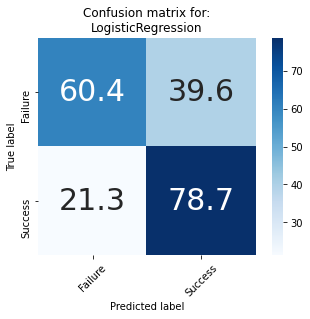

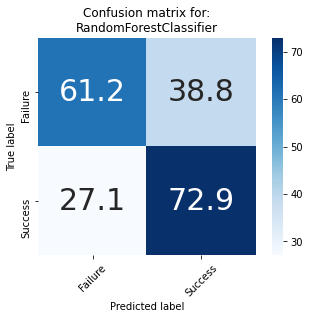

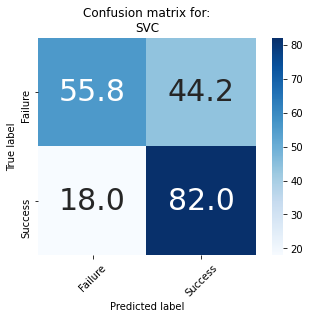

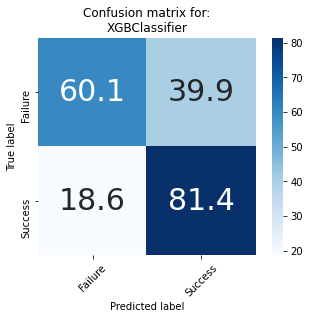

In [42]:
#Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix

for i,model in enumerate([logreg_model, rand_forst_model, svm_model, xgb_model]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100 # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.1f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax = plt.gca()
    #plt.draw()
    labels = ['Failure', 'Success']
    ax.set_xticklabels(labels, rotation = 45)
    ax.set_yticklabels(labels)
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

SGB Classifier is the best model of the four, in terms of evaluation metrics, and also has an acceptable running time on this dataset--therefore, chosen for further hyperparameter optimisation

### Adjusting of hyperparameters

https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster (Refer to 'Parameters for Tree Booster')

In [53]:
# A parameter grid for XGBoost
params = {
        'eta': [0.1, 0.5, 1.], #learning rate
        'min_child_weight': [1, 5, 10], #The larger min_child_weight is, the more conservative the algorithm will be.
        'gamma': [0.5, 1, 1.5, 2, 5], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be
        'max_depth': [3, 4, 5] #Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit
        }

#  Make a precision scoring object
scorer = make_scorer(precision_score) 

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(xgb_model, params, scorer, verbose=0, n_jobs=-1)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train) 

# Get the estimator
best_clf = grid_fit.best_estimator_ 

# Make predictions using the unoptimized and model
predictions = (xgb_model.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test) 

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Precision score on testing data: {:.4f}".format(precision_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final precision score on the testing data: {:.4f}".format(precision_score(y_test, best_predictions)))
print(best_clf)

/Users/christinarudolf/Documents/neuefische_ds/ds_project_2_ks/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass scoring=make_scorer(precision_score) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/christinarudolf/Documents/neuefische_ds/ds_project_2_ks/.venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[07:11:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation m

## Feature importance

In [74]:
fi = pd.DataFrame({'feature': features.columns, 'importance': grid_fit.best_estimator_.feature_importances_}).sort_values('importance', ascending = False)


In [76]:
fi.head(10)

,feature,importance
37,staff_pick_True,0.289570
8,category_food,0.080874
10,category_journalism,0.074815
3,category_crafts,0.051538
2,category_comics,0.048131
12,category_photography,0.045975
14,category_technology,0.035219
11,category_music,0.031325
0,usd_goal,0.030277
4,category_dance,0.029531


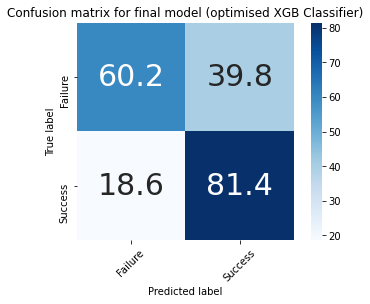

In [79]:
#Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix

for i,model in enumerate([grid_fit]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100 # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.1f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax = plt.gca()
    #plt.draw()
    labels = ['Failure', 'Success']
    ax.set_xticklabels(labels, rotation = 45)
    ax.set_yticklabels(labels)
    plt.title('Confusion matrix for final model (optimised XGB Classifier)');